# Bank Customers Churn 

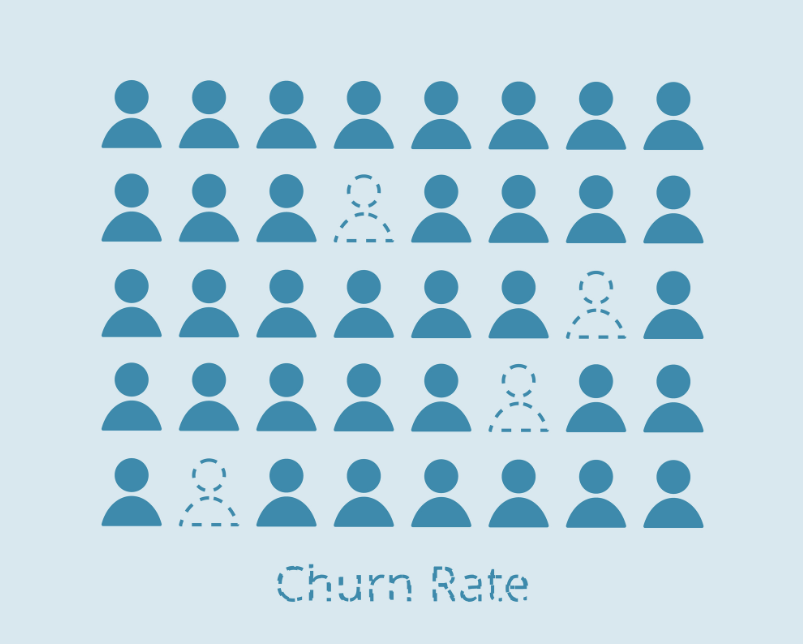

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, log_loss

# 1 Data Preprocessing and Exploration 

In [2]:
df = pd.read_csv("Customer-Churn-Records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [5]:
df.duplicated().values.any()

False

In [6]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Lets see the distribuition of values towards each features of the dataset.

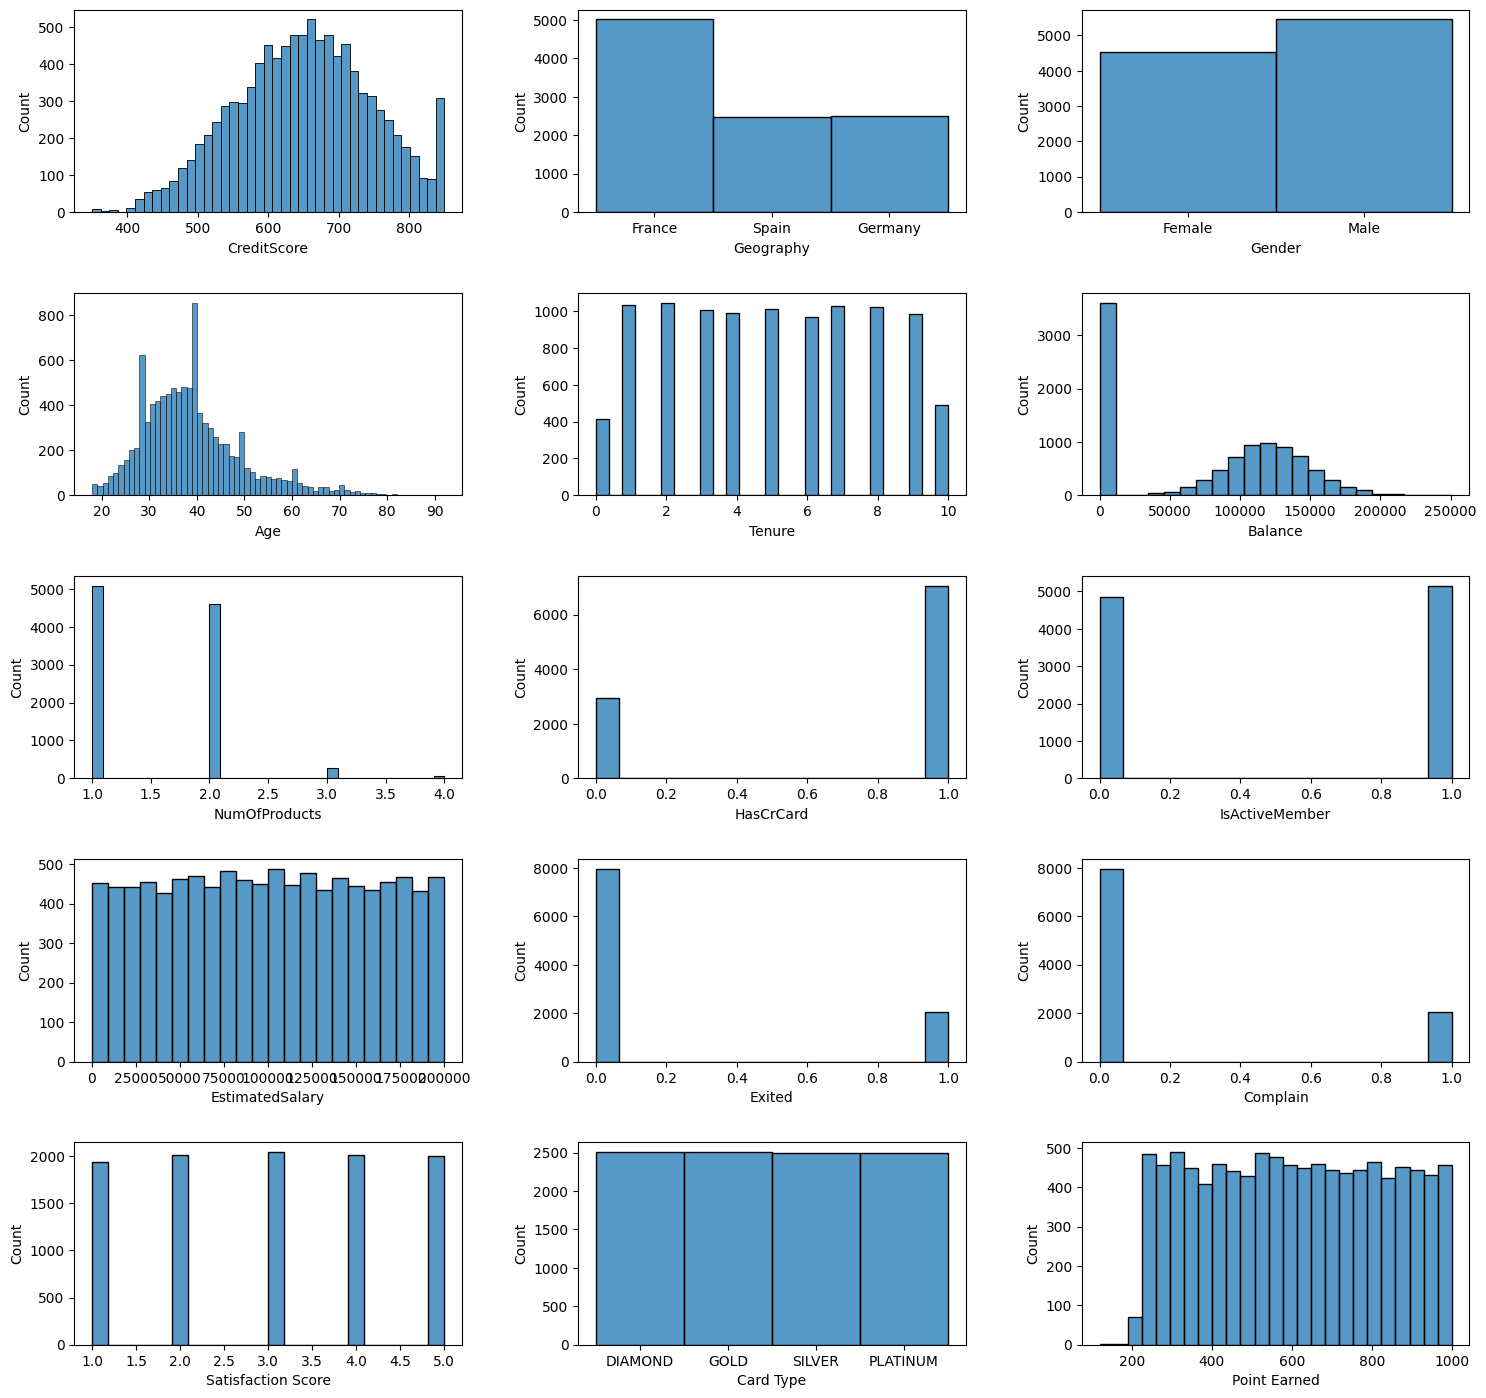

In [8]:
fig, ax = plt.subplots(5, 3, figsize=(18, 15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4)
for variable, subplot in zip(df.columns, ax.flatten()):
  sns.histplot(df[variable], ax=subplot)

# 2 Data Wrangling

## 2.1 One-hot encoding and Standardization

The geography, gender, and card type are displayed as textual categorical variables. Let's convert them to numerical format using the one-hot encoding method.

In [9]:
df_clean = df.drop(["Geography", "Gender", "Card Type"], axis=1)

geografy = pd.get_dummies(df.Geography)
gender = pd.get_dummies(df.Gender)
card = pd.get_dummies(df['Card Type'])

In [10]:
df_encod=pd.concat([df_clean, geografy, gender, card], axis=1)

In [11]:
df_encod.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,France,Germany,Spain,Female,Male,DIAMOND,GOLD,PLATINUM,SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [12]:
X = df_encod.drop(['Exited'], axis=1)
Y = df_encod['Exited'].to_numpy()
Y[0:100]

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.32622142,  0.29351742, -1.04175968, -1.22584767, -0.91158349,
         0.64609167,  0.97024255,  0.02188649,  1.97290849, -0.72113042,
        -0.63083912,  0.99720391, -0.57873591, -0.57380915,  1.09598752,
        -1.09598752,  1.72882367, -0.57765819, -0.57658047, -0.57673443],
       [-0.44003595,  0.19816383, -1.38753759,  0.11735002, -0.91158349,
        -1.54776799,  0.97024255,  0.21653375,  1.97290849, -0.00981614,
        -0.66625089, -1.00280393, -0.57873591,  1.74273971,  1.09598752,
        -1.09598752,  1.72882367, -0.57765819, -0.57658047, -0.57673443],
       [-1.53679418,  0.29351742,  1.03290776,  1.33305335,  2.52705662,
         0.64609167, -1.03067011,  0.2406869 ,  1.97290849, -0.00981614,
        -1.01594219,  0.99720391, -0.57873591, -0.57380915,  1.09598752,
        -1.09598752,  1.72882367, -0.57765819, -0.57658047, -0.57673443],
       [ 0.50152063,  0.00745665, -1.38753759, -1.22584767,  0.80773656,
        -1.54776799, -1.03067011, -0.10891792, -

## 2.2 Train-Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
Y_test.shape

(2000,)

# 3 Machine Learning Modeling - Classification 

In [15]:
def plot_confusion_matrix(y,y_predict):
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not exit', 'exit']); ax.yaxis.set_ticklabels(['did not exit', 'exit']) 
    plt.show() 

## 3.1 Logistic Regression

In [16]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
             

In [17]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [18]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9984999999999999


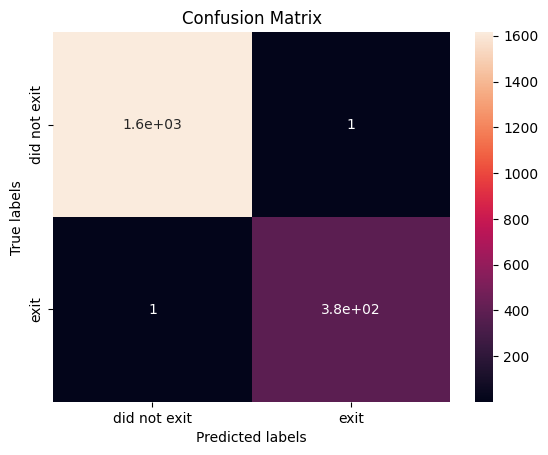

In [19]:
y_hat_log = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_hat_log)

## 3.2 Decision Tree

In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [21]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9946249999999999


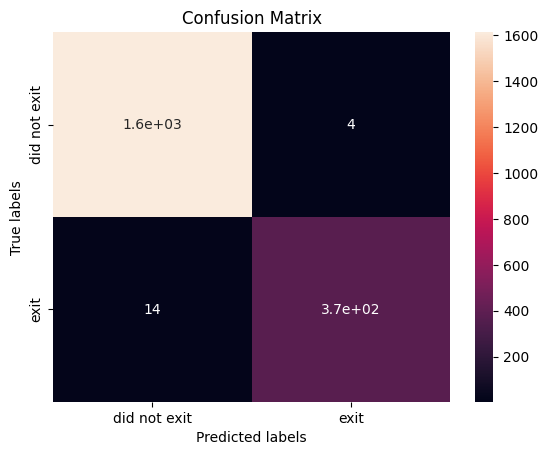

In [23]:
y_hat_tree = tree_cv.predict(X_test)

plot_confusion_matrix(Y_test,y_hat_tree)

## 3.3 KNN

In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [25]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [26]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}
accuracy : 0.990625


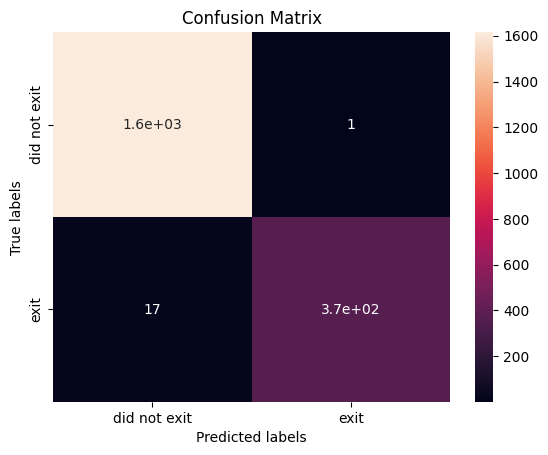

In [27]:
y_hat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_hat_knn)

# 4 Conclusion

In [28]:
params = [knn_cv.best_params_, logreg_cv.best_params_, tree_cv.best_params_]
accuracy = [knn_cv.best_score_, logreg_cv.best_score_, tree_cv.best_score_]
score = [knn_cv.score(X_test, Y_test), logreg_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test)]
F1_score = [f1_score(Y_test, y_hat_knn), f1_score(Y_test, y_hat_log), f1_score(Y_test, y_hat_tree)]
log = [log_loss(Y_test, y_hat_knn), log_loss(Y_test, y_hat_log), log_loss(Y_test, y_hat_tree)]

tb_metric = {"Model": ["KNN", 'Log. Regression', 'Decision Tree'], "Params": params, "Accuracy": accuracy, "Score":score, "F1 score": F1_score, "Log loss": log}

df_metric = pd.DataFrame(tb_metric)
df_metric

,Model,Params,Accuracy,Score,F1 score,Log loss
0,KNN,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2}",0.990625,0.991,0.976000,0.324393
1,Log. Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.998500,0.999,0.997389,0.036044
2,Decision Tree,"{'criterion': 'gini', 'max_depth': 14, 'max_fe...",0.994625,0.991,0.976190,0.324393


The table below summarizes the churn prediction results. Logistic regression achieved the best overall metrics, followed by the decision tree and KNN.

It's worth noting that the high accuracy observed in the models can be attributed to the use of an artificial dataset.